# # Classifiers comparison on texts with naive Bayes assumption

In this session of laboratory we compare two models for categorical data probabilistic modeling: 
1. multivariate Bernoulli 
2. multinomial on a dataset 

We adopt a dataset on Twitter messages labelled with emotions (Joy vs Sadness).

The following program shows the loading of the data from a file.

The following program reads the data file and loads in a sparse way the matrix using the scipy.sparse library

In [174]:
import json

def getInitParams(): return {
    "n_features": 11288, # number of features (distinct elements in the documents)
    "n_rows": 11981, # number rows of the matrix
    "n_elements": 71474, # number of the existing values in the matrix (not empty, to be loaded in the matrix in a sparse way)7
    "path_dataset": "dataset/joy_sadness6000.txt",
}
params = getInitParams()

In [175]:
# declare the row and col arrays with the indexes of the matrix cells (non empty) to be loaded from file
# they are needed because the matrix is sparse and we load in the matrix only the elements which are present
row = np.empty(params["n_elements"], dtype=int)
col = np.empty(params["n_elements"], dtype=int)
data = np.empty(params["n_elements"], dtype=int)

print(row)
print(col)
print(data)

[ -410181616         277  -393609088 ...         277 -1133418224
         277]
[-410181616        277 -393609088 ...      11986      11986      11986]
[-410181616        277 -393609088 ...         42         43         44]


In [176]:
row_n = 0 # number of current row to be read and managed
current_element = 0 # position in the three arrays: row, col and data
twitter_labels = [] # list of class labels (target array) of the documents (twitter) that will be read from the input file
twitter_target = [] # list of 0/1 for class labels

# Dataset: open joy_sadness6000 
contains the description of the content of a collection of 11981 messages from Twitter.
Each message belongs to a class (either Joy or Sadness) 
representing the sentiment that is supposed to be expressed by the words in that message.

First, in the file, we have the description of the messages of the first class (Joy) and then Sadness: 
classLabel can be either the string Joy or Sadness.

There are 5988 messages of Joy and 5994 of Sadness.

Each line of the file represents a single message.

The format of each line is a sequence of pairs <wordID, count> followed by the class label, separated by commas.
An example of a line is: 38,3,264,1,635,1,2780,1,Joy
- where 38 is the identifier of the first word occurring in that message,
- and 3 is the number of times (frequency count) in which that word is present in that message.
- <wordID, count>
- pairs <38,3>, <264,1>, <635,1>, <2780,1>, CLASS = JOY
- 38, 264, 635, 2780 are the identifiers of the words and 3, 1, 1, 1 are the respective frequencies in that message.

In [177]:
from numpy import ndarray, zeros
import numpy as np
import scipy
from scipy.sparse import csr_matrix

with open(params["path_dataset"], "r") as dataset_file:
    for line in dataset_file:
        
        # LINE TO ARRAY
        element_list = line.split(',')  # e.g. [38,3,264,1,635,1,2780,1,Joy]
        length = len(element_list) # array length = 8
        
        # GET CLASS OF MESSAGE
        last_element = element_list[length-1] # GET CLASS: Joy or Sadness (LAST ELEMENT)
        class_name = last_element.strip() # clean CLASS value eliminate the '\n'
        
        # twitter_labels contains the labels (Joy/Sadness);
        twitter_labels.append(class_name) 
        # twitter_target contains 0/1 for the respective labels
        # 0 = Joy, 1 = Sadness
        if (class_name == "Joy"):
           twitter_target.append(0)
        else:
           twitter_target.append(1)
        
        # reading all the doc elements from the beginning of the list
        i=0 
        while(i < (length-1)):
            # identifier of the element in the document equivalent to the column index
            # e.g. 1,1,2,1,3,1,4,1,Joy
            element_id = int(element_list[i]) # ID = 1
            element_id = element_id - 1 # the index starts from 0 (the read id starts from 1)
            i = i + 1
            # frequecy: make access to the following value in the file which
            # is the count of the element in the document 
            value_cell = int(element_list[i])
            
            i = i + 1
            # load the data in the three arrays: 
            # the first two are the row and col indexes; 
            # the last one is the matrix cell value
            row[current_element] = row_n 
            col[current_element] = element_id
            data[current_element] = value_cell
            
            current_element = current_element + 1
        row_n = row_n+1
        
dataset_file.close

print(row_n)
print(row)
print(col)
print(data)

11981
[          0           0           0 ...         277 -1133418224
         277]
[    0     1     2 ... 11986 11986 11986]
[ 1  1  1 ... 42 43 44]


In [10]:
# RESULTS
# loads the matrix by means of the indexes and the values in the three arrays just filled
twitter_data = csr_matrix((data, (row, col)), shape=(params["n_rows"], params["n_features"])).toarray()
print(twitter_data)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [11]:
# print twitter labels array
print(twitter_labels)

['Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy'

In [12]:
# print twitter target array
print(twitter_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Write a program in the following cell that splits the data matrix in training and test set (by random selection) and predicts the class (Joy/Sadness) of the messages on the basis of the words. 
Consider the two possible models:
multivariate Bernoulli and multinomial Bernoulli.
Find the accuracy of the models and test is the observed differences are significant.

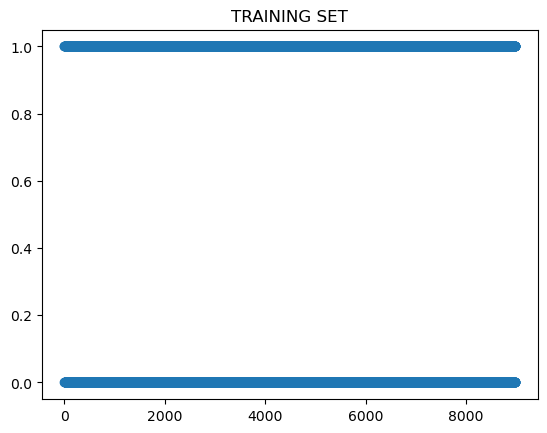

n. examples for TRAINING SET = 8985


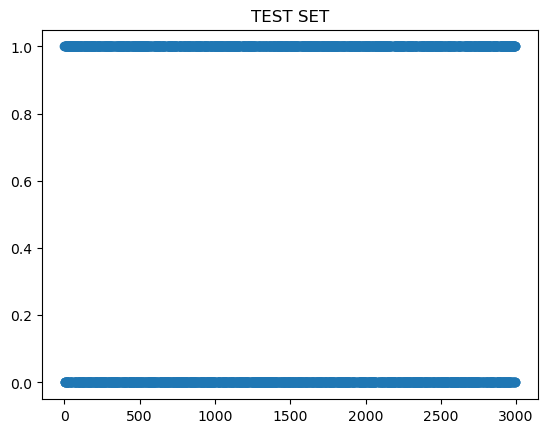

n. examples for TEST SET = 2996


In [172]:
# SPLIT DATASET IN TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

X_train, X_test, Y_train, Y_test = train_test_split(twitter_data, twitter_target, test_size=0.25)
plt.scatter(np.arange(0,len(X_train),1), Y_train)
plt.title("TRAINING SET")
plt.show()
print("n. examples for TRAINING SET =", len(X_train)) # EXAMPLES: 8985

plt.scatter(np.arange(0,len(X_test),1), Y_test)
plt.title("TEST SET")
plt.show()
print("n. examples for TEST SET =", len(X_test)) # EXAMPLES: 2996

In [179]:
# TRAINING SET
print("#######################################################\nDATA")
print(X_train)
print("#######################################################\nCLASSES")
print(Y_train)

#######################################################
DATA
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
#######################################################
CLASSES
[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1

In [197]:
# TEST SET
print("#######################################################\nDATA")
print(X_test)
print("#######################################################\nCLASSES")
print(Y_test)

#######################################################
DATA
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
#######################################################
CLASSES
[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0

# 3 types of Naive Bayes Classifiers
- bernoulli: good for making predictions from binary features
- multinomial: good when your features describe discrete frequency counts (e. g. word counts)
- gaussian: good for making predictions from normally distributed features

# Examples:
- Bernoulli (multivariate Naive Bayes): Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

- Multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

- Gaussian Naive Bayes (GaussianNB)

In [113]:
# multivariate Bernoulli models
import numpy as np
from sklearn.metrics import accuracy_score

# example dataset
"""
MULTIVARIATE MODELS: Documents are modeled in an array of 0 and 1
e.g.  [0, 0, 0] 
represent a document in which the word "a" is not present, the word "b" is not present, the word "c" is not present
[0, 0, 0] -> class 0
[1, 1, 0] -> class 0
[0, 1, 0] -> class 1
[1, 0, 1] -> class 2
[0, 1, 0] -> class 2
 
"""
X = np.array([[0, 0, 0], [1, 1, 0], [0, 1, 0], [1, 0, 1], [0, 1, 0]])
Y_expect = np.array([0, 0, 1, 2, 2])

# BERNOULLI NB
from sklearn.naive_bayes import BernoulliNB
print("BERNOULLI NB")
BernNB = BernoulliNB() # binarize = True
# Fit Naive Bayes classifier according to X, Y
BernNB.fit(X, Y)
print(X[0:1], " class => ", Y_expect[0], " predict class => ", BernNB.predict(X[0:1]))
print(X[1:2], " class => ", Y_expect[1], " predict class => ", BernNB.predict(X[1:2]))
print(X[2:3], " class => ", Y_expect[2], " predict class => ", BernNB.predict(X[2:3]))
print(X[3:4], " class => ", Y_expect[3], " predict class => ", BernNB.predict(X[3:4]))
print(X[4:5], " class => ", Y_expect[4], " predict class => ", BernNB.predict(X[4:5]))

print("\nscore = ", BernNB.score(X, Y)) # 0.6 -> 60% correct prediction

y_predict = BernNB.predict(X)
print("accuracy score", accuracy_score(Y_expect, y_predict))

######################################################################################################################
# MULTINOMIAL NB
print("\n#############################################################################")
from sklearn.naive_bayes import MultinomialNB
print("BERNOULLI NB\n")
MultiNB = MultinomialNB()
MultiNB.fit(X, Y)
y_predict = MultiNB.predict(X)
print("y_predict = ", y_predict)
print("\nscore = ", MultiNB.score(X, Y)) # 0.6 -> 60% correct prediction
print("accuracy score", accuracy_score(Y_expect, y_predict))

######################################################################################################################
# GAUSSIN NB
print("\n#############################################################################")
from sklearn.naive_bayes import GaussianNB
print("BERNOULLI NB\n")
GausNB = GaussianNB()
GausNB.fit(X, Y)
y_predict = GausNB.predict(X)
print("y_predict = ", y_predict)
print("\nscore = ", GausNB.score(X, Y)) # 0.6 -> 60% correct prediction
print("accuracy score", accuracy_score(Y_expect, y_predict))

BERNOULLI NB
[[0 0 0]]  class =>  0  predict class =>  [0]
[[1 1 0]]  class =>  0  predict class =>  [0]
[[0 1 0]]  class =>  1  predict class =>  [0]
[[1 0 1]]  class =>  2  predict class =>  [2]
[[0 1 0]]  class =>  2  predict class =>  [0]

score =  0.6
accuracy score 0.6

#############################################################################
BERNOULLI NB

y_predict =  [0 0 0 2 0]

score =  0.6
accuracy score 0.6

#############################################################################
BERNOULLI NB

y_predict =  [0 0 1 2 1]

score =  0.8
accuracy score 0.8


# Dataset: open joy_sadness6000 

In [210]:
# MULTIVARIATE BERNOULLI NAIVE BAYES MODEL
from sklearn.naive_bayes import BernoulliNB

bernoulliNBClassifeir = BernoulliNB().fit(X_train, Y_train)
y_predicted = bernoulliNBClassifeir.predict(X_test)
print("\nTRAINING SET PREDICTION:\nScore = ", bernoulliNBClassifeir.score(X_train, Y_train))
print("\nTEST SET PREDICTION:\nScore = ", bernoulliNBClassifeir.score(X_test, Y_test))

print("\nclassification_report")
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predicted))

# confusion matrix
# summary for performance of classification algorithm
# TP = True Positives = classifier predict an observation belongs to a certain class and the observation actually belongs to that class.
# TN = True Negatives = classifier predict an observation does NOT belong to a certain class and the observation actually does not belong to that class.
# FP = False Positives = classifier predict an observation belongs to a certain class but the observation actually does not belong to that class.
# FN = False Negatives = classifier predict an observation does not belong to a certain class but the observation actually belongs to that class.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])


TRAINING SET PREDICTION:
Score =  0.9759599332220368

TEST SET PREDICTION:
Score =  0.9459279038718291

classification_report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1490
           1       0.92      0.98      0.95      1506

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      0.95      2996

Confusion matrix

 [[1364  126]
 [  36 1470]]
True Positives(TP) =  1364
True Negatives(TN) =  1470
False Positives(FP) =  126
False Negatives(FN) =  36


In [200]:
# MULTINOMIAL NAIVE BAYES MODEL
from sklearn.naive_bayes import MultinomialNB

multinomialNBClassifeir = MultinomialNB().fit(X_train, Y_train)
y_predicted = multinomialNBClassifeir.predict(X_test)
print("\nTRAINING SET PREDICTION:\nScore = ", multinomialNBClassifeir.score(X_train, Y_train))
print("\nTEST SET PREDICTION:\nScore = ", multinomialNBClassifeir.score(X_test, Y_test))

print("\nclassification_report")
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predicted))

# confusion matrix
# summary for performance of classification algorithm
# TP = True Positives = classifier predict an observation belongs to a certain class and the observation actually belongs to that class.
# TN = True Negatives = classifier predict an observation does NOT belong to a certain class and the observation actually does not belong to that class.
# FP = False Positives = classifier predict an observation belongs to a certain class but the observation actually does not belong to that class.
# FN = False Negatives = classifier predict an observation does not belong to a certain class but the observation actually belongs to that class.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])


TRAINING SET PREDICTION:
Score =  0.9738452977184195

TEST SET PREDICTION:
Score =  0.9449265687583445

classification_report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1490
           1       0.92      0.98      0.95      1506

    accuracy                           0.94      2996
   macro avg       0.95      0.94      0.94      2996
weighted avg       0.95      0.94      0.94      2996

Confusion matrix

 [[1359  131]
 [  34 1472]]
True Positives(TP) =  1359
True Negatives(TN) =  1472
False Positives(FP) =  131
False Negatives(FN) =  34


In [199]:
# GAUSSIAN NAIVE BAYES MODEL
from sklearn.naive_bayes import GaussianNB

gaussianNBClassifier = GaussianNB().fit(X_train, Y_train)
y_predicted = gaussianNBClassifier.predict(X_test)
print("\nTRAINING SET PREDICTION:\nScore = ", gaussianNBClassifier.score(X_train, Y_train))
print("\nTEST SET PREDICTION:\nScore = ", gaussianNBClassifier.score(X_test, Y_test))

print("\nclassification_report")
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predicted))

# confusion matrix
# summary for performance of classification algorithm
# TP = True Positives = classifier predict an observation belongs to a certain class and the observation actually belongs to that class.
# TN = True Negatives = classifier predict an observation does NOT belong to a certain class and the observation actually does not belong to that class.
# FP = False Positives = classifier predict an observation belongs to a certain class but the observation actually does not belong to that class.
# FN = False Negatives = classifier predict an observation does not belong to a certain class but the observation actually belongs to that class.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])


TRAINING SET PREDICTION:
Score =  0.9559265442404007

TEST SET PREDICTION:
Score =  0.8644859813084113

classification_report
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1490
           1       0.81      0.96      0.88      1506

    accuracy                           0.86      2996
   macro avg       0.88      0.86      0.86      2996
weighted avg       0.88      0.86      0.86      2996

Confusion matrix

 [[1142  348]
 [  58 1448]]
True Positives(TP) =  1142
True Negatives(TN) =  1448
False Positives(FP) =  348
False Negatives(FN) =  58
